# Import Data

In [1]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y= data_fetcher.get_y()


------class run complete------



#  Feature Scaling

In [2]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
#formula for scaling: x_scaled = (x - mean)/std_deviation
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

# Initial Model

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_clf = KNeighborsClassifier()

# Fit the model on the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_1 = knn_clf.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------KNN Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------KNN Metrics----------

Accuracy: 0.85
Precision: 0.8648648648648649
Recall: 0.8888888888888888
F1 Score: 0.8767123287671232

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.86      0.89      0.88        36

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



## Initial Confusion matrix 

[[19  5]
 [ 4 32]]


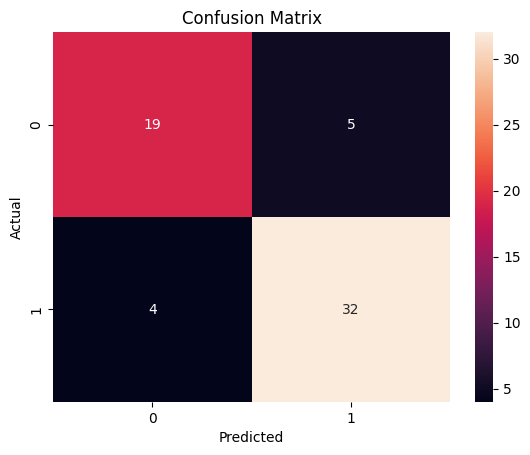

In [4]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Grid Search

In [5]:
#perform grid search for different neighbors
#34 secs
from sklearn.model_selection import GridSearchCV
import numpy as np
#give the parameters to be tested
param_grid = {'n_neighbors': np.arange(1, 100), 
                'weights' : ['uniform', 'distance'],
                'p': [1,2],
                'algorithm': ['ball_tree', 'kd_tree', 'brute'], 
                'leaf_size': [2,3,4,5,10,15,16,18,20, 30],
            }
#perform grid search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
#fit the model to find the best parameters
knn_tuned = grid.fit(X_train, y_train)

#display the best parameters
print("\nTuned KNN Parameters: {}".format(grid.best_params_))
print("Best score is {}".format(grid.best_score_))
print("best estimator: ", knn_tuned.best_estimator_)

Fitting 10 folds for each of 11880 candidates, totalling 118800 fits

Tuned KNN Parameters: {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best score is 0.8282608695652176
best estimator:  KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=9)


# Final Model

In [6]:
#initialize the model with the best parameters
from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=9)

#fit the model
knn_tuned = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=9)
knn_tuned.fit(X_train, y_train)
#test the model with the best parameters on the test set
y_pred = knn_tuned.predict(X_test)

#evaluate the model
print("\n----------Final KNN Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)




----------Final KNN Metrics----------

Accuracy: 0.9166666666666666
Precision: 0.8974358974358975
Recall: 0.9722222222222222
F1 Score: 0.9333333333333333

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.90      0.97      0.93        36

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60



## Confusion Matrix

[[20  4]
 [ 1 35]]


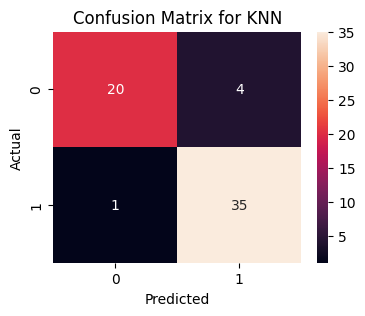

In [7]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Cross Validation

In [8]:
#cross validaayion for 10 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring="accuracy") #scorinf can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #the lower the standard deviation, the better the model
#standard deviation is calculated for the scores of each fold
#get the variance of the scores
print("Variance:", scores.var()) #the lower the variance, the better the model


Fold 0 : 0.8333333333333334
Fold 1 : 0.7916666666666666
Fold 2 : 0.7916666666666666
Fold 3 : 0.8333333333333334
Fold 4 : 0.8333333333333334
Fold 5 : 0.875
Fold 6 : 0.75
Fold 7 : 0.8333333333333334
Fold 8 : 0.8333333333333334
Fold 9 : 0.6956521739130435

Mean: 0.8070652173913043
Standard Deviation: 0.04920237828159762
Variance: 0.002420874028565429


## ROC

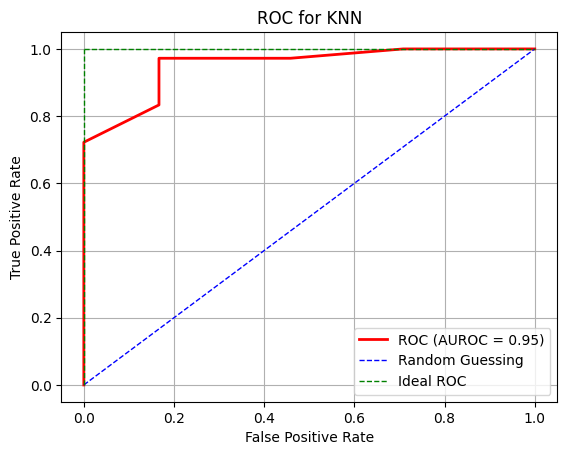

In [9]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = knn_tuned.predict_proba(X_test)[:,1] #get the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr,'r',lw=2, label='ROC (AUROC = %0.2f)' % roc_auc)

#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#set the plot labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## PRC

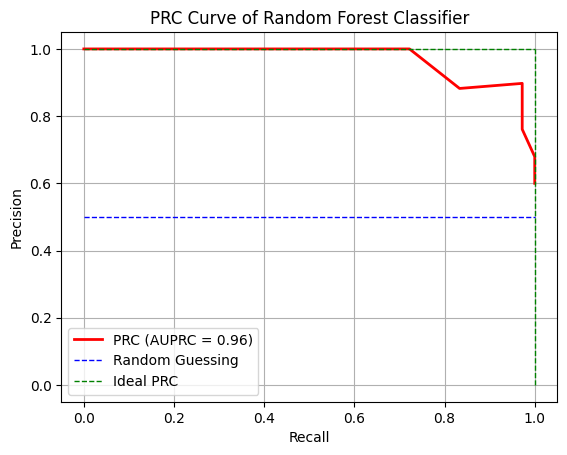

In [10]:
# plot PRC for the model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#plot the PRC curve
y_pred_proba = knn_tuned.predict_proba(X_test)[:,1] #get the probabilities of the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
average_precision = average_precision_score(y_test, y_pred_proba).round(2)
plt.plot(recall, precision,'r', label="PRC (AUPRC = %0.2f)" % average_precision, linewidth = 2)
#average precision is the area under the PRC curve

#plot the ideal PRC curve and random guessing PRC curve
plt.plot([0,1],[0.5,0.5],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal PRC")
plt.plot([1,1],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC Curve of Random Forest Classifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Learning Curve

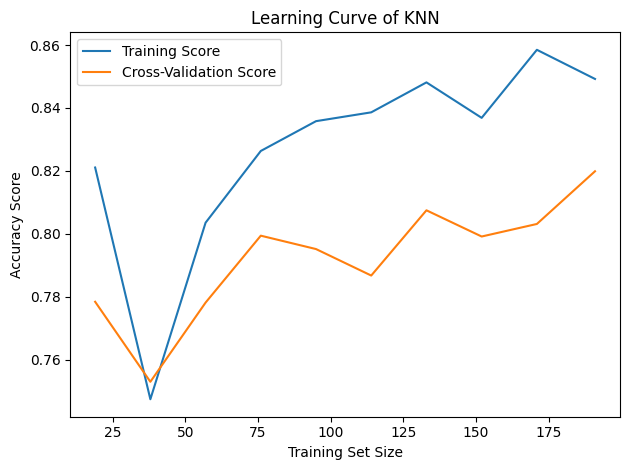

In [14]:

#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(knn_tuned, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,10))

#plot the learning curve
import matplotlib.pyplot as plt
import numpy as np
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of KNN")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()

#Conclusions:
#1. From the learning curve, we can conclude that we have a good balance between bias and variance.
#2. The model is neither overfitting nor underfitting.
#3. The learning curve shows that the model is just right.'''

# Save Model

In [12]:
import joblib
joblib.dump(knn_tuned, "joblib_dump/KNN.pkl")

['joblib_dump/KNN.pkl']